**Đề bài:**
Bộ dữ liệu iris chứa thông tin về 150 loài hoa iris, bao gồm chiều dài và chiều rộng của cánh hoa và lá hoa. Nhiệm vụ của bạn là sử dụng thuật toán ID3 để xây dựng một cây quyết định để phân loại loài hoa iris.

### **Bước 1: Tải bộ dữ liệu iris và thực hiện phân tích sơ bộ.**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

### **Bước 2: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra**

- Hàm train_test_split dùng để chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.

- Các thông số:
> - **array**: Các mảng dữ liệu cần chia (ví dụ: các mảng đặc trưng, mảng nhãn).
> - **test_size**: Các mảng dữ liệu cần chia (ví dụ: các mảng đặc trưng, mảng nhãn).
> - **train_size**: Tỉ lệ phần trăm của tập huấn luyện (nếu không được chỉ định thì sẽ lấy phần còn lại của test_size để tạo thành tập huấn luyện).
> - **random_state**: Số nguyên để đảm bảo rằng kết quả chia sẽ giống nhau mỗi lần chạy thuật toán (mặc định là **'None'**).
> - **shuffle**: Chọn xem liệu dữ liệu sẽ được trộn trước khi chia hay không (mặc định là **True**).
> - **stratify**: Dữ liệu nhãn được sử dụng để tạo các phân lớp đối với tập dữ liệu, giúp đảm bảo rằng tỷ lệ phân phối của các lớp giữa các tập huấn luyện và kiểm tra là cân bằng (mặc định là **None**).


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.3, random_state=0)

### **Bước 3: Áp dụng thuật toán ID3 trên tập huấn luyện.**

- Lớp **DecisionTreeClassifier** cho phép xây dựng cây quyết định từ dữ liệu. Đây là một thuật toán học có giám sát, nó có các thông số cấu hình sau:
- **Các thông số:**
> - **criterion**: Đo lường chất lượng phân chia, có thể là "gini" hoặc "entropy" (mặc định là "gini").
> - **splitter**: Chiến lược chọn phương án phân chia tốt nhất, có thể là "best" hoặc "random" (mặc định là "best").
> - **min_samples_split**: Số lượng mẫu tối thiểu để một nút có thể được phân chia tiếp (mặc định là 2).
> - **min_samples_leaf**: Số lượng mẫu tối thiểu trong một lá để giữ lá này lại (mặc định là 1).
> - **max_features**: Số lượng đặc trưng tối đa được sử dụng để tìm kiếm phân chia tốt nhất (mặc định là "None").
> - **random_state**: Số nguyên để đảm bảo rằng kết quả huấn luyện sẽ giống nhau mỗi lần chạy thuật toán (mặc định là "None").
> - **min_impurity_decrease**: Một nút sẽ được phân chia nếu phân chia đó giảm giá trị impurity lớn hơn hoặc bằng ngưỡng này (mặc định là 0).


In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### **Bước 4: Đánh giá mô hình trên tập kiểm tra.**

In [4]:
# Nhập hàm accuracy_score từ thư viện sklearn.metrics
from sklearn.metrics import accuracy_score

# Sử dụng phương thức predict trên dt (mô hình cây quyết định đã được đào tạo) để dự đoán nhãn trên tập dữ liệu kiểm tra X_test
y_pred = dt.predict(X_test)

# Sử dụng hàm accuracy_score để tính toán độ chính xác của mô hình dựa trên kết quả dự đoán y_pred so với nhãn thực tế y_test
accuracy = accuracy_score(y_test, y_pred)

# In ra kết quả độ chính xác của mô hình trên tập dữ liệu kiểm tra.
print('Accuracy:', accuracy)

Accuracy: 0.9777777777777777


### **Bước 5: Hiển thị cây quyết định.**

- Nhập hàm export_graphviz từ thư viện sklearn.tree và hàm graphviz từ thư viện graphviz
- Sử dụng hàm export_graphviz để tạo ra đồ thị cây quyết định.
> - **dt**: là mô hình cây quyết định được đào tạo.
> - **out_file=None**: không xuất ra file.
> - **feature_names=iris.feature_names**: là danh sách tên đặc trưng trong tập dữ liệu.
> - **class_names=iris.target_names**: là danh sách tên các lớp trong tập dữ liệu.
> - **filled=True**: điều chỉnh màu sắc của các nút dựa trên giá trị của impurity.
> - **rounded=True**: điều chỉnh góc của các nút là tròn.
> - **special_characters=True**: cho phép hiển thị các ký tự đặc biệt.

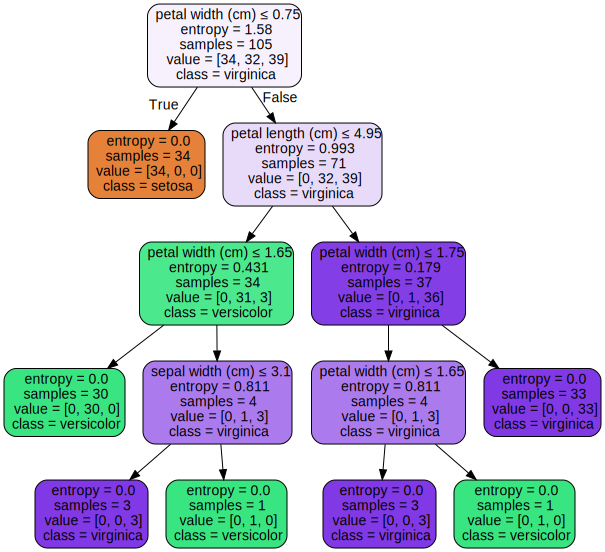

In [5]:

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# Sử dụng hàm graphviz.Source để hiển thị cây quyết định vừa tạo ra dưới dạng đồ thị.
graph = graphviz.Source(dot_data)
graph


### **Kết quả:**
Kết quả trên tập kiểm tra cho thấy mô hình có độ chính xác là 0.98. Cây quyết định được tạo ra có thể được hiển thị bằng cách sử dụng thư viện Graphviz.